# Basic RNN
- Objective: to understand basics of RNN & LSTM

## Recurrent Neural Networks
- Feedforward neural networks (e.g. MLPs and CNNs) are powerful, but they are not optimized to handle "sequential" data
- In other words, they do not possess "memory" of previous inputs
- For instance, consider the case of translating a corpus. You need to consider the **"context"** to guess the next word to come forward



<br>
- RNNs are suitable for dealing with sequential format data since they have **"recurrent"** structure
- To put it differently, they keep the **"memory"** of earlier inputs in the sequence
</br>
<img src="http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg" style="width: 600px"/>

<br>
- However, in order to reduce the number of parameters, every layer of different time steps shares same parameters
</br>

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" style="width: 600px"/>

## Load Dataset

In [1]:
import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

C:\Users\OMR\Anaconda3\envs\tf\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

In [4]:
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

In [5]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [6]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)

In [7]:
y_train = y_data[:1395]
y_test = y_data[1395:]

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


## 1. Vanilla RNN
- Vanilla RNNs have a simple structure
- However, they suffer from the problem of "long-term dependencies"
- Hence, they are not able to keep the **sequential memory" for long

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" style="width: 600px"/>

### Why TANH ??



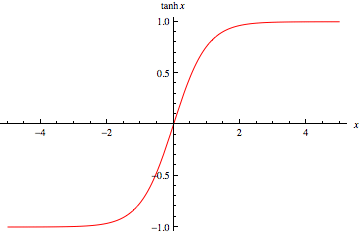

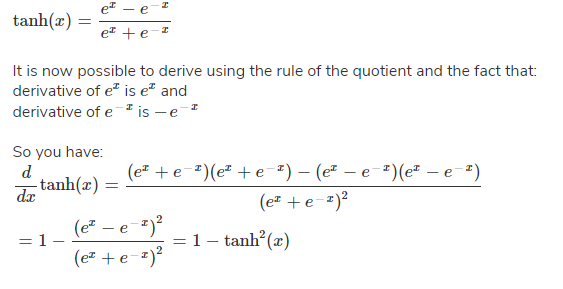

### Tanh

Mathematical expression: tanh(z) = [exp(z) - exp(-z)] / [exp(z) + exp(-z)]

1st order derivative: tanh'(z) = 1 - ([exp(z) - exp(-z)] / [exp(z) + exp(-z)])^2 = 1 - tanh^2(z)

Advantages:

* (1) Often found to converge faster in practice
* (2) Gradient computation is less expensive

To overcome the vanishing gradient problem, we need a function whose second derivative can sustain for a long range before going to zero. Tanh is a good function with the above property.

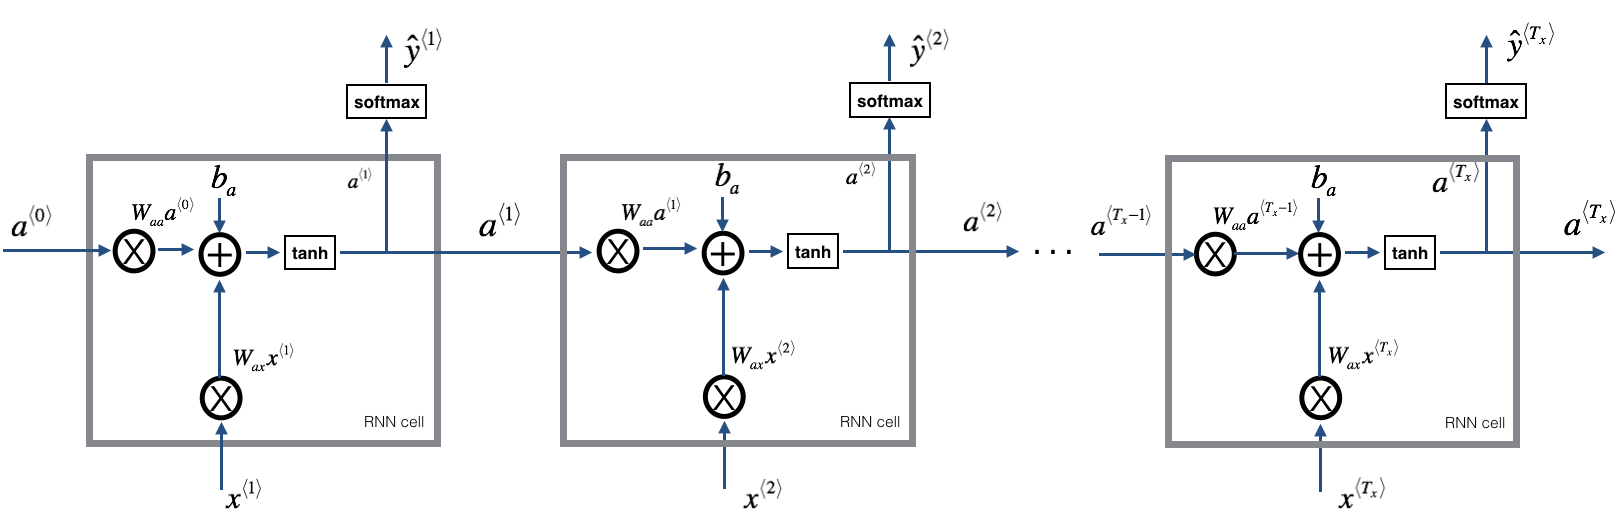

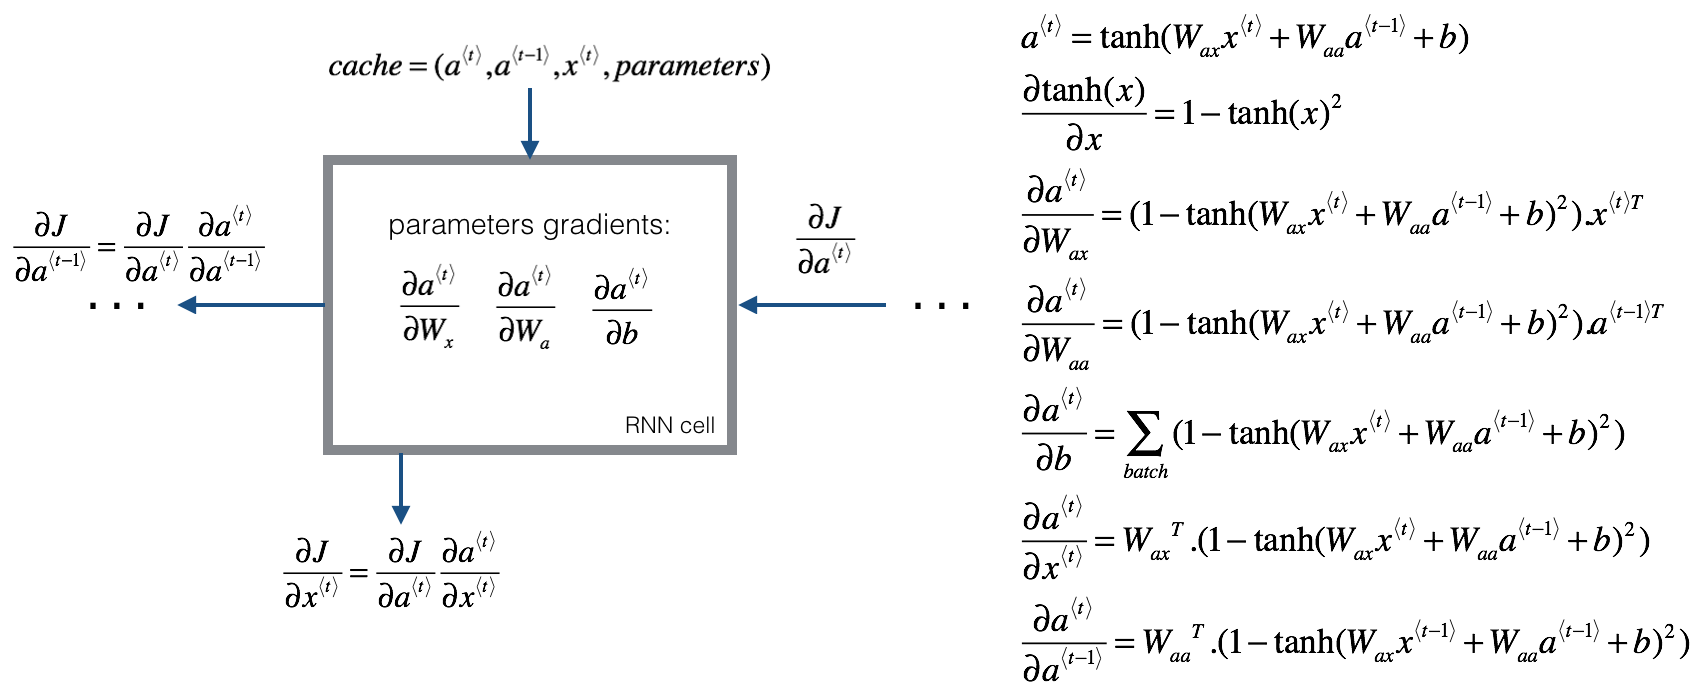

In [9]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [10]:
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [11]:
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50, verbose = 1)

In [12]:
model.fit(X_train, y_train)

Epoch 1/200
1395/1395 [==============================] - 5s 4ms/step - loss: 3.3976 - acc: 0.3176
Epoch 2/200
1395/1395 [==============================] - 1s 693us/step - loss: 1.5618 - acc: 0.7118
Epoch 3/200
1395/1395 [==============================] - 1s 733us/step - loss: 1.2093 - acc: 0.7147
Epoch 4/200
1395/1395 [==============================] - 1s 705us/step - loss: 1.1754 - acc: 0.7147
Epoch 5/200
1395/1395 [==============================] - 1s 688us/step - loss: 1.1641 - acc: 0.7147
Epoch 6/200
1395/1395 [==============================] - 1s 706us/step - loss: 1.1588 - acc: 0.7147
Epoch 7/200
1395/1395 [==============================] - 1s 696us/step - loss: 1.1559 - acc: 0.7147
Epoch 8/200
1395/1395 [==============================] - 1s 707us/step - loss: 1.1532 - acc: 0.7147 0s - loss: 1.1579 - acc: 0.
Epoch 9/200
1395/1395 [==============================] - 1s 744us/step - loss: 1.1504 - acc: 0.7147
Epoch 10/200
1395/1395 [==============================] - 1s 707us/step - 

1395/1395 [==============================] - 1s 796us/step - loss: 0.9510 - acc: 0.7240
Epoch 80/200
1395/1395 [==============================] - 1s 796us/step - loss: 0.9178 - acc: 0.7254
Epoch 81/200
1395/1395 [==============================] - 1s 811us/step - loss: 0.9026 - acc: 0.7355
Epoch 82/200
1395/1395 [==============================] - 1s 902us/step - loss: 0.9074 - acc: 0.7276
Epoch 83/200
1395/1395 [==============================] - 1s 818us/step - loss: 0.9029 - acc: 0.7369
Epoch 84/200
1395/1395 [==============================] - 1s 831us/step - loss: 0.9001 - acc: 0.7355
Epoch 85/200
1395/1395 [==============================] - 1s 874us/step - loss: 0.8891 - acc: 0.7376
Epoch 86/200
1395/1395 [==============================] - 1s 858us/step - loss: 0.8850 - acc: 0.7341
Epoch 87/200
1395/1395 [==============================] - 1s 788us/step - loss: 0.9030 - acc: 0.7391
Epoch 88/200
1395/1395 [==============================] - 1s 781us/step - loss: 0.8837 - acc: 0.7362
Epo

1395/1395 [==============================] - 1s 792us/step - loss: 0.8093 - acc: 0.7470
Epoch 160/200
1395/1395 [==============================] - 1s 787us/step - loss: 0.7998 - acc: 0.7484
Epoch 161/200
1395/1395 [==============================] - 1s 897us/step - loss: 0.7938 - acc: 0.7412
Epoch 162/200
1395/1395 [==============================] - 1s 856us/step - loss: 0.8159 - acc: 0.7355
Epoch 163/200
1395/1395 [==============================] - 1s 821us/step - loss: 0.7998 - acc: 0.7455
Epoch 164/200
1395/1395 [==============================] - 1s 794us/step - loss: 0.7937 - acc: 0.7470
Epoch 165/200
1395/1395 [==============================] - 1s 836us/step - loss: 0.8019 - acc: 0.7441
Epoch 166/200
1395/1395 [==============================] - 1s 792us/step - loss: 0.7953 - acc: 0.7498
Epoch 167/200
1395/1395 [==============================] - 1s 791us/step - loss: 0.8007 - acc: 0.7448
Epoch 168/200
1395/1395 [==============================] - 1s 821us/step - loss: 0.7903 - acc: 0

In [68]:
y_pred = model.predict(X_test)

 50/599 [=>............................] - ETA: 0s

In [69]:
y_test_ = np.argmax(y_test, axis = 1)

In [70]:
print(accuracy_score(y_pred, y_test_))

0.74958263773


## 2. Stacked Vanilla RNN
- RNN layers can be stacked to form a deeper network

<img src="https://lh6.googleusercontent.com/rC1DSgjlmobtRxMPFi14hkMdDqSkEkuOX7EW_QrLFSymjasIM95Za2Wf-VwSC1Tq1sjJlOPLJ92q7PTKJh2hjBoXQawM6MQC27east67GFDklTalljlt0cFLZnPMdhp8erzO" style="width: 500px"/>

In [74]:
def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = True))   # return_sequences parameter has to be set True to stack
    model.add(SimpleRNN(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [75]:
model = KerasClassifier(build_fn = stacked_vanilla_rnn, epochs = 200, batch_size = 50, verbose = 1)

In [ ]:
model.fit(X_train, y_train)

In [77]:
y_pred = model.predict(X_test)

500/599 [========================>.....] - ETA: 0s

In [78]:
print(accuracy_score(y_pred, y_test_))

0.746243739566


## 3. LSTM
- LSTM (long short-term memory) is an improved structure to solve the problem of long-term dependencies

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" style="width: 600px"/>

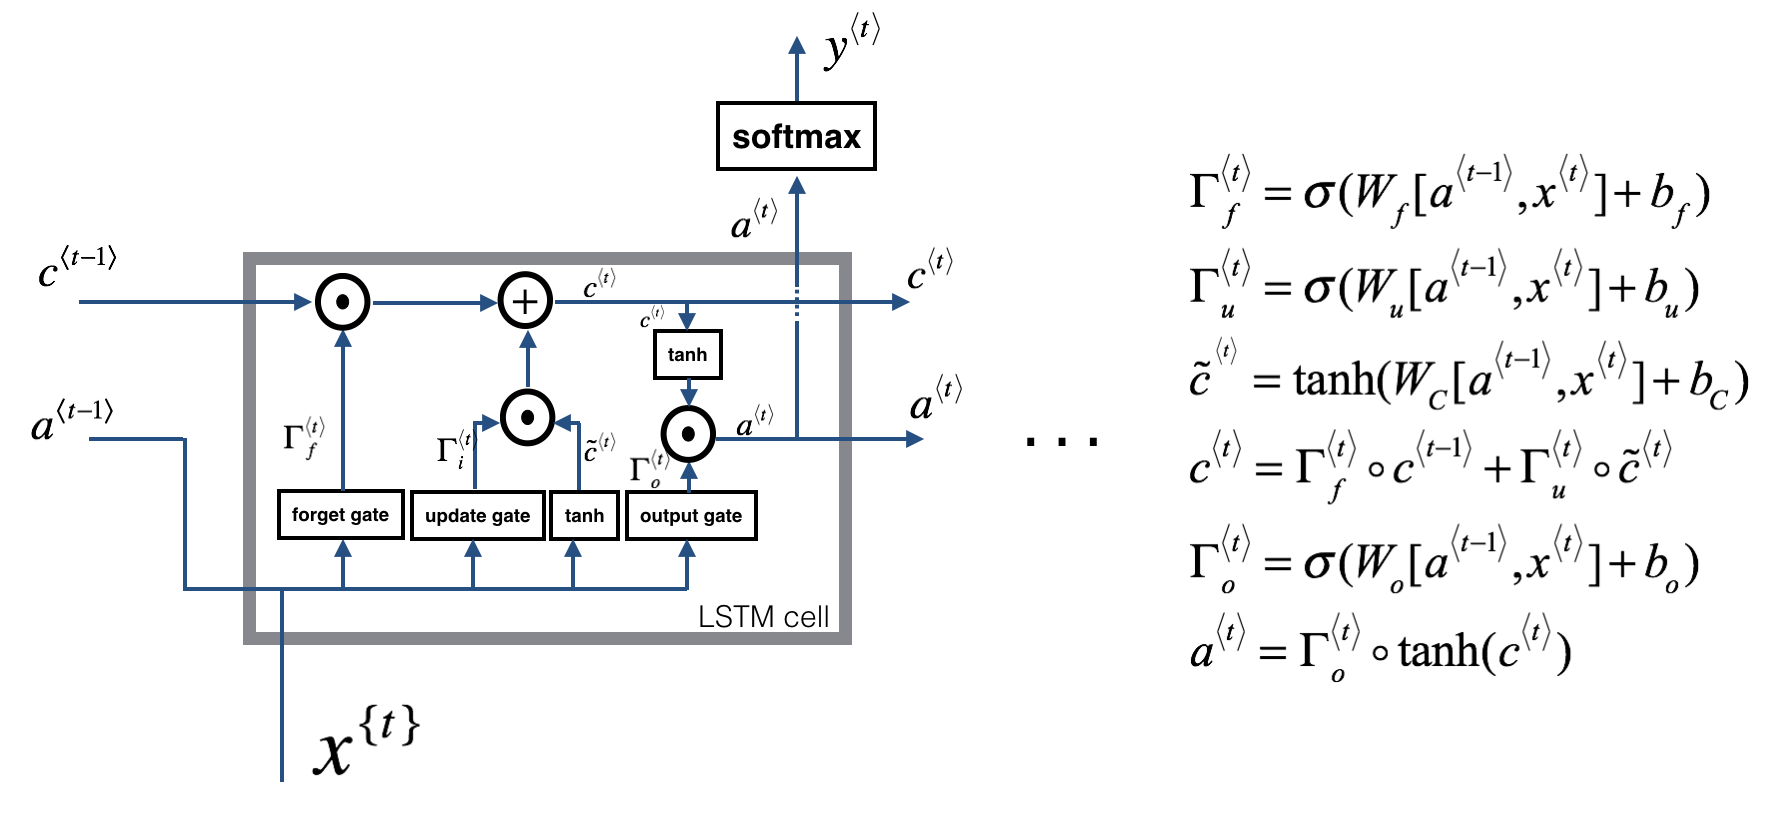

In [79]:
from keras.layers import LSTM

In [80]:
def lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape = (49,1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [81]:
model = KerasClassifier(build_fn = lstm, epochs = 200, batch_size = 50, verbose = 1)

In [ ]:
model.fit(X_train, y_train)

In [83]:
y_pred = model.predict(X_test)

500/599 [========================>.....] - ETA: 0s

In [84]:
# accuracy improves by adopting LSTM structure
print(accuracy_score(y_pred, y_test_))

0.844741235392


## 4. Stacked LSTM
- LSTM layers can be stacked as well

In [85]:
def stacked_lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape = (49,1), return_sequences = True))
    model.add(LSTM(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [86]:
model = KerasClassifier(build_fn = stacked_lstm, epochs = 200, batch_size = 50, verbose = 1)

In [ ]:
model.fit(X_train, y_train)

In [88]:
y_pred = model.predict(X_test)

500/599 [========================>.....] - ETA: 0s

In [89]:
print(accuracy_score(y_pred, y_test_))

0.858096828047
